In [2]:
#import necessary modules

import csv

import numpy as np
import networkx as nx 
import pandas as pd 
import matplotlib.pyplot as plt 

#this is a "magic" function
#causes plots to be displayed below cells and stored in the notebook
%matplotlib inline

In [3]:
#first need to import some usable data to work with
#this week I'll use data that represents something "real" like a specific time boundary
#or set of editions
#this is from a new csv compiled by Logan Schmidt from data provided by James Tattersall
#-13 is the first peice of data in the entire set we have on hand, ranges from -13 to 
!head one.csv

-13	1	12/01/1948	An Esteemed Correspondent	J. Alsop ;Digamma *;Thomas Cranstoun *;John Giblin *;J.M. *	1;	Jan-49;	xx;xx	41;
-12	1	01/01/1949	T. Morley	Unknown ;T.J.L. 	1;	Feb-49;Feb-49	xx;xx	9;
-11	1	02/01/1949	T.J.L. 	J.W. 	1	03/01/49	xx	41
-10	1	02/01/1949	Enquirer	T. Morley 	1	03/01/49	xx	22
-9	1	03/01/1949	Thomas Morley	J.W. 	1	04/01/49	xx	22
-8	1	04/01/1949	Thomas Morley	UNKNOWN;UNKNOWN	1;1	May-49;Jun-49	xx;xx	41;
-7	1	04/01/1949	Collegian	J.W. 	1	05/01/49	xx	22
-6	1	05/01/1949	Gomphos					3
-5	1	05/01/1949	S.A.G.					74
-4	1	06/01/1949	Geometricus	 UNKNOWN	1	07/01/49	xx	47


In [16]:
#first create list using all columns
allData = []
with open('one.csv', 'r') as f:
    filereader = csv.reader(f, delimiter="\t", quotechar='"')
    #next(filereader) # skips header row, we don't want to skip since we don't have a header
    for row in filereader:
            allData.append(row)
            #for this practice, lets keep seperate data by ranges of dates and we can compare them!  nifty!
fortyNine = []
edge = []
i=0
for x in allData:
    date=x[2].split("/")
    if len(date)==3:
        if date[2]=="1949":
            edge.append([x[3],x[4]])
            fortyNine.append(edge[i])
            i=i+1
#fix the solver column!
fixedSolver = []
edge = []
i=0
for x in fortyNine:
    if ";" in x[1]:
        solvers = x[1].split(";")
        for y in solvers:
            fixedSolver.append([x[0],y])
    else:
        fixedSolver.append(x)
    i=i+1

In [17]:
fixedSolver

[['T. Morley', 'Unknown '],
 ['T. Morley', 'T.J.L. '],
 ['T.J.L. ', 'J.W. '],
 ['Enquirer', 'T. Morley '],
 ['Thomas Morley', 'J.W. '],
 ['Thomas Morley', 'UNKNOWN'],
 ['Thomas Morley', 'UNKNOWN'],
 ['Collegian', 'J.W. '],
 ['Gomphos', ''],
 ['S.A.G.', ''],
 ['Geometricus', ' UNKNOWN'],
 [' UNKNOWN', 'J.W. '],
 ['Geometricus', ' UNKNOWN'],
 ['J.W.', ''],
 ['Geometricus', 'Thomas Wilkinson '],
 ['Philo-Mathematicus', 'Thomas Wilkinson'],
 ['', ''],
 ['Theta', 'Thomas Wilkinson '],
 ['Theta', 'Thomas Wilkinson '],
 ['Theta', 'Thomas Wilkinson '],
 ['Thomas Wilkinson', 'Thomas Wilkinson '],
 ['Thomas Wilkinson', 'Thomas Wilkinson '],
 ['Geometricus', 'Thomas Wilkinson '],
 [' UNKNOWN', 'J.S. '],
 [' UNKNOWN', 'Thomas Wilkinson *'],
 [' UNKNOWN', 'J.M. [of Biggleswade] *'],
 [' UNKNOWN', 'J.S. '],
 [' UNKNOWN', 'Thomas Wilkinson *'],
 [' UNKNOWN', 'J.M. [of Biggleswade] *'],
 ['Thomas Morley', 'J.S. '],
 ['Thomas Morley', 'Thomas Wilkinson *'],
 ['Thomas Morley', 'J.M. [from Plymouth] *'],

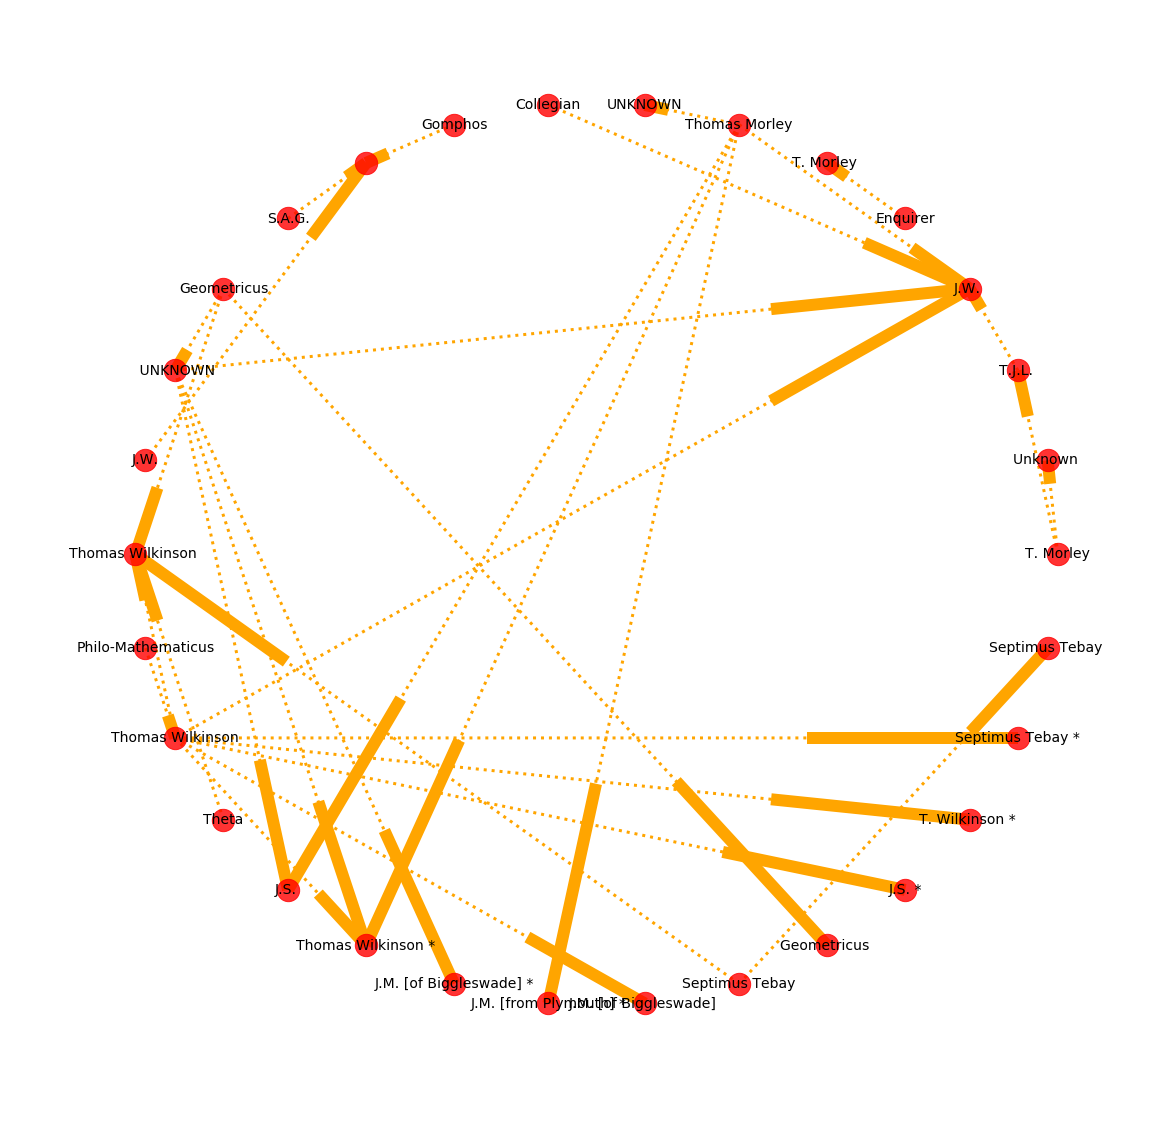

In [37]:
#digraph also works!
#thick lines are on the side of the solver
D = nx.DiGraph()
D.add_edges_from(fixedSolver)

#width, length
plt.figure(figsize=(20,20))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.circular_layout(D)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(D, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_edges(D, pos=layout, width=3, style='dotted',
                       edge_color='orange')
nx.draw_networkx_labels(D, pos=layout, font_size=14)

#plt.show()
plt.savefig("week4solverDiGraph.png", format="PNG")

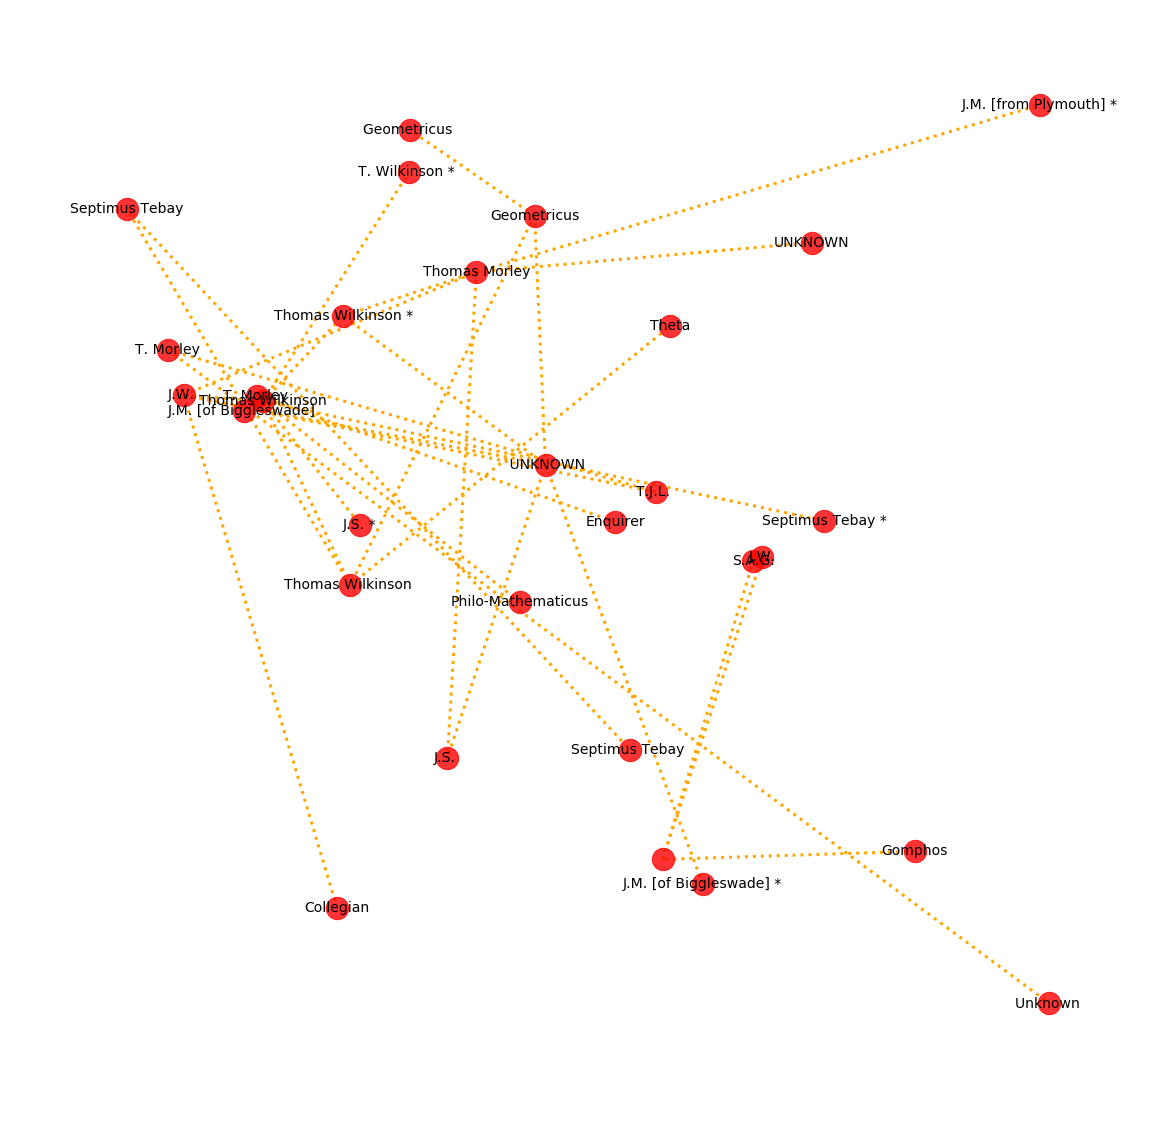

In [30]:
#RANDOM
#thick lines are on the side of the solver
D = nx.Graph()
D.add_edges_from(fixedSolver)

#width, length
plt.figure(figsize=(20,20))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.random_layout(D)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(D, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_edges(D, pos=layout, width=3, style='dotted',
                       edge_color='orange')
nx.draw_networkx_labels(D, pos=layout, font_size=14)

#plt.show()
plt.savefig("week4solverRandom.png", format="PNG")

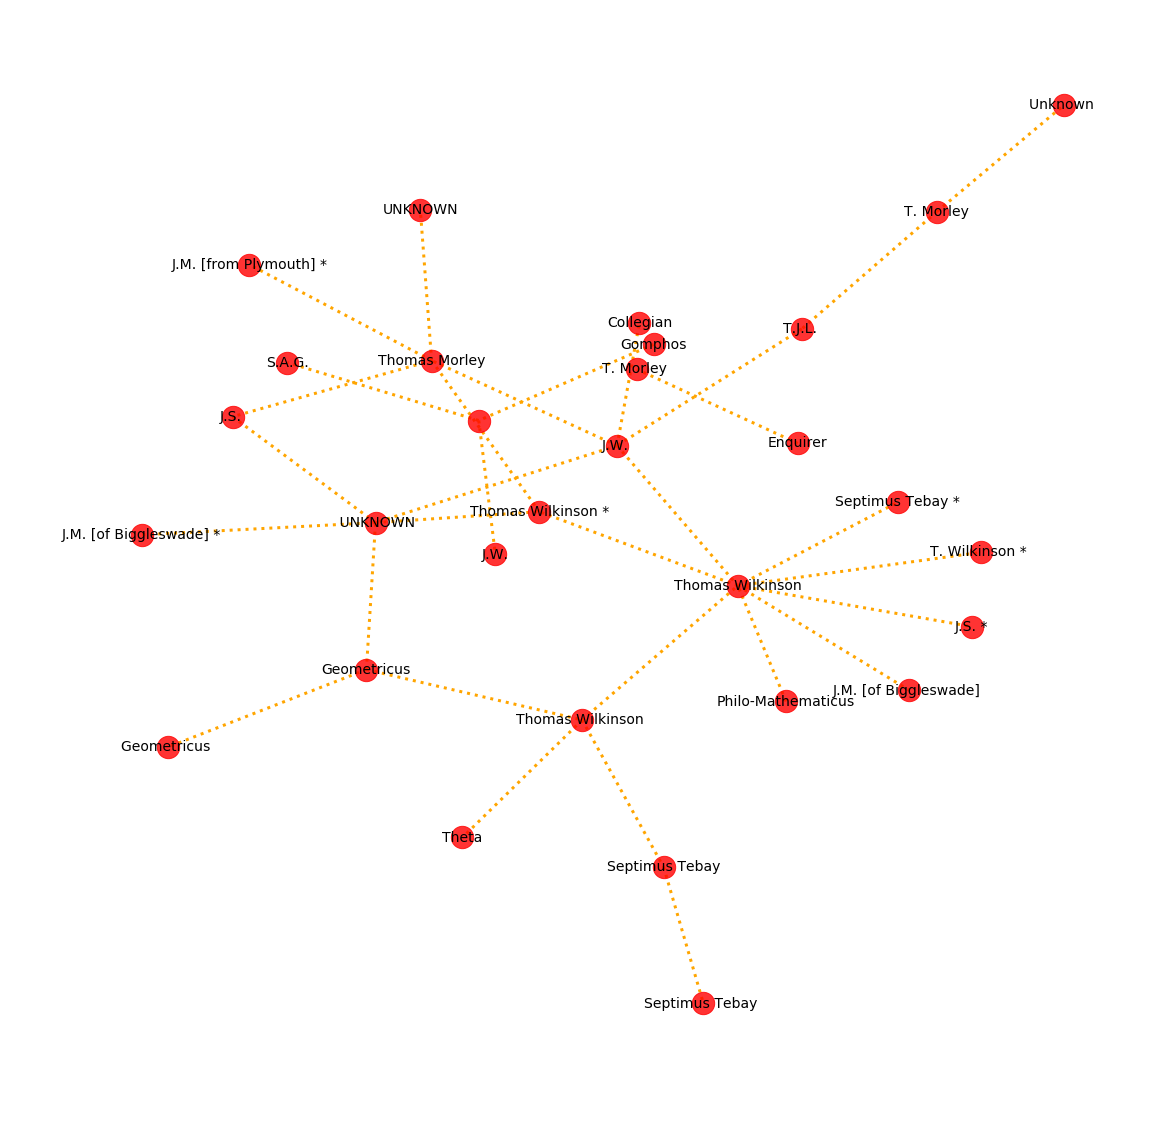

In [31]:
#KAWAI
#thick lines are on the side of the solver
D = nx.Graph()
D.add_edges_from(fixedSolver)

#width, length
plt.figure(figsize=(20,20))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.kamada_kawai_layout(D)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(D, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_edges(D, pos=layout, width=3, style='dotted',
                       edge_color='orange')
nx.draw_networkx_labels(D, pos=layout, font_size=14)

#plt.show()
plt.savefig("week4solverKawai.png", format="PNG")

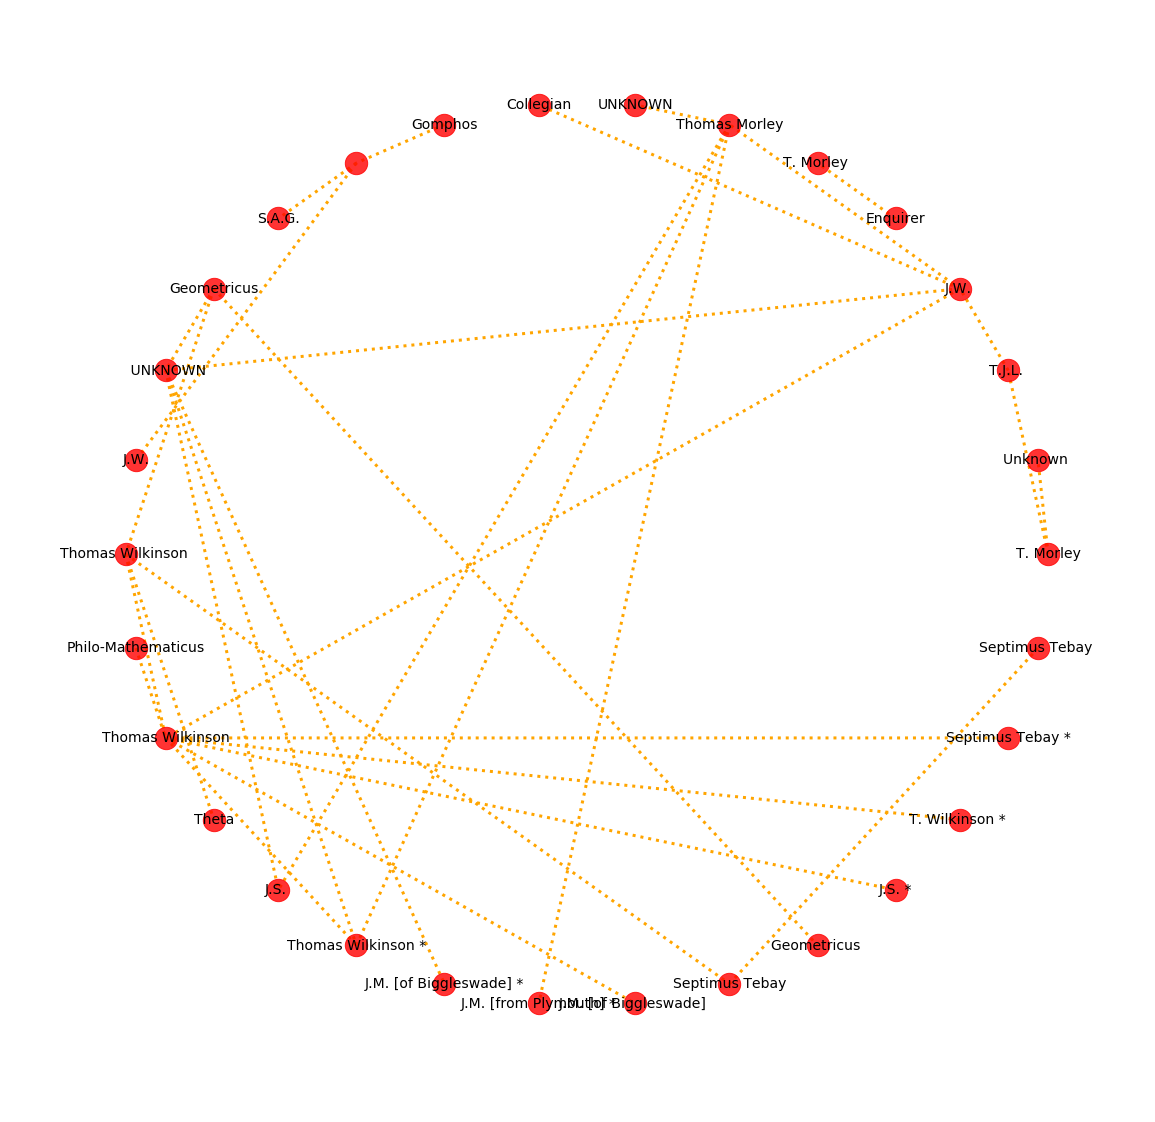

In [32]:
#RESCALE
#thick lines are on the side of the solver
D = nx.Graph()
D.add_edges_from(fixedSolver)

#width, length
plt.figure(figsize=(20,20))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.circular_layout(D, scale=3)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(D, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_edges(D, pos=layout, width=3, style='dotted',
                       edge_color='orange')
nx.draw_networkx_labels(D, pos=layout, font_size=14)

#plt.show()
plt.savefig("week4solverRescale.png", format="PNG")

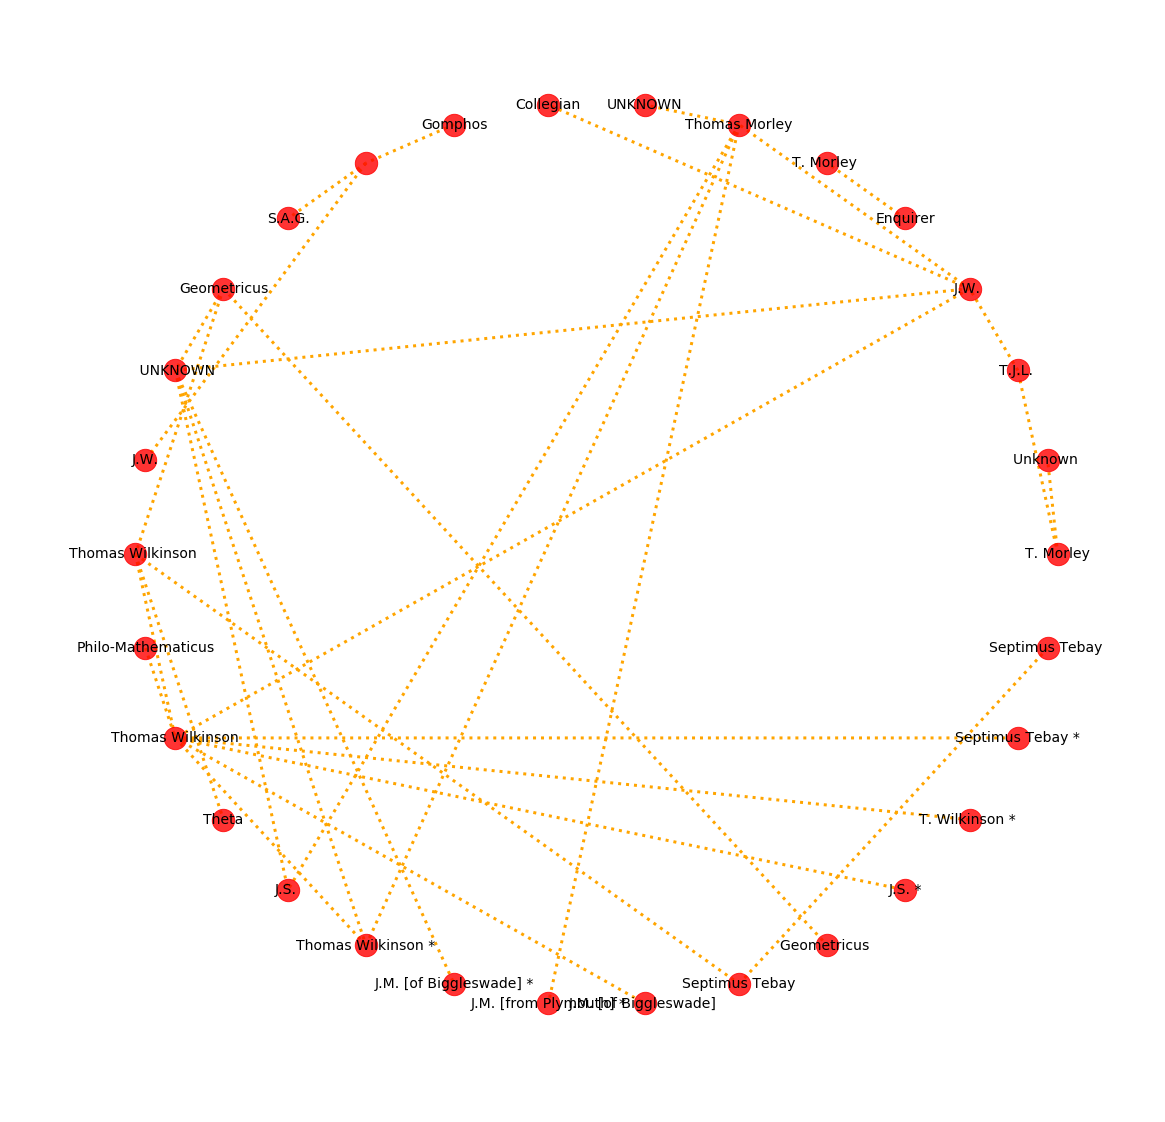

In [33]:
#SHELL, list of lists, might be useful in the future with connecting lists of 10 years?
#thick lines are on the side of the solver
D = nx.Graph()
D.add_edges_from(fixedSolver)

#width, length
plt.figure(figsize=(20,20))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.shell_layout(D)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(D, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_edges(D, pos=layout, width=3, style='dotted',
                       edge_color='orange')
nx.draw_networkx_labels(D, pos=layout, font_size=14)

#plt.show()
plt.savefig("week4solverShell.png", format="PNG")

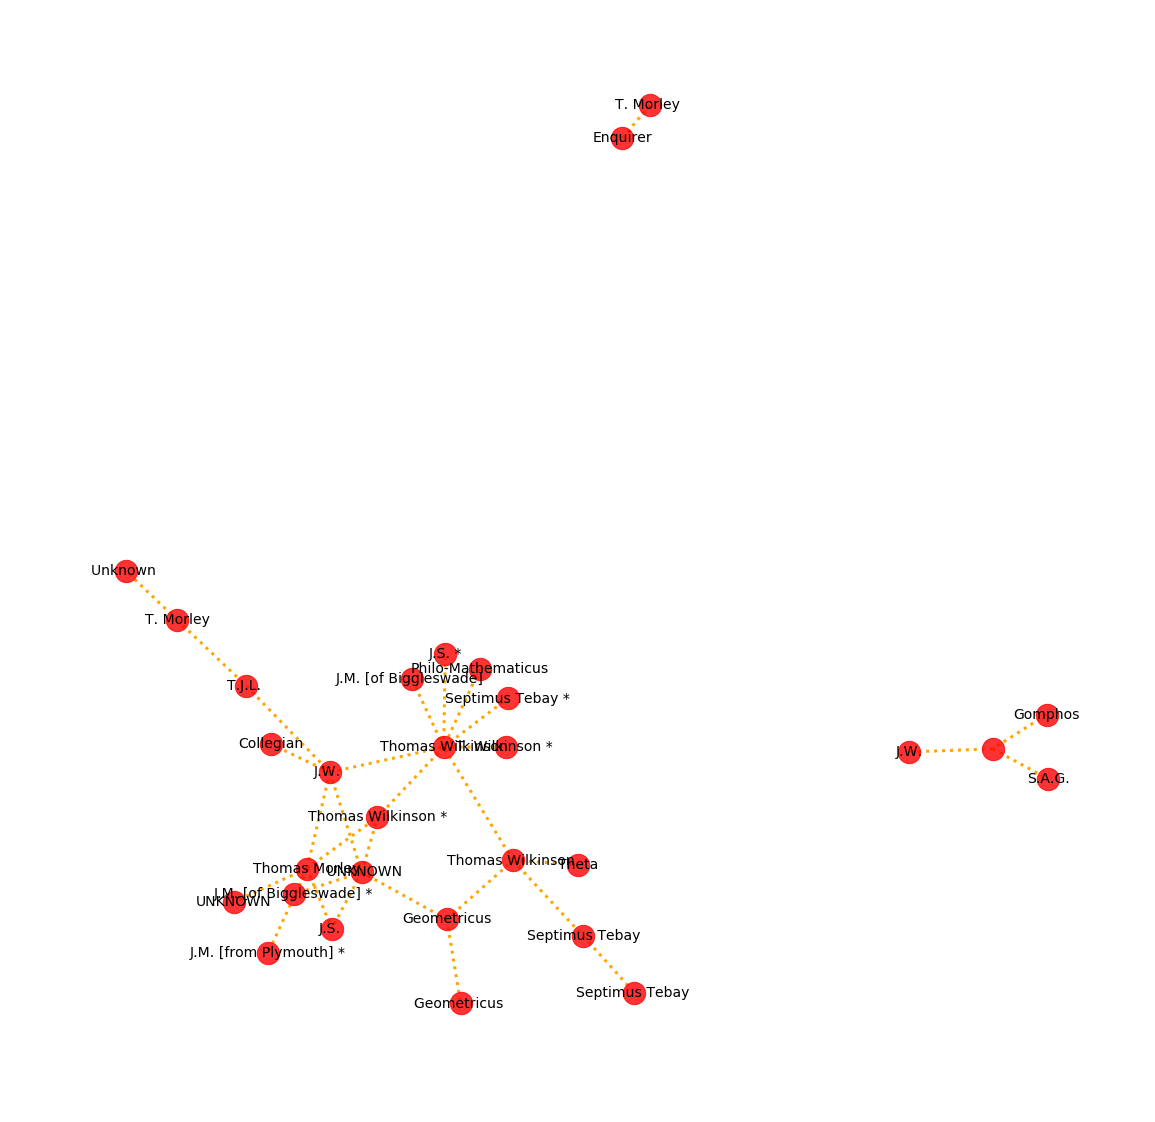

In [34]:
#SPRING
#thick lines are on the side of the solver
D = nx.Graph()
D.add_edges_from(fixedSolver)

#width, length
plt.figure(figsize=(20,20))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.spring_layout(D, scale=3)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(D, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_edges(D, pos=layout, width=3, style='dotted',
                       edge_color='orange')
nx.draw_networkx_labels(D, pos=layout, font_size=14)

#plt.show()
plt.savefig("week4solverSpring.png", format="PNG")

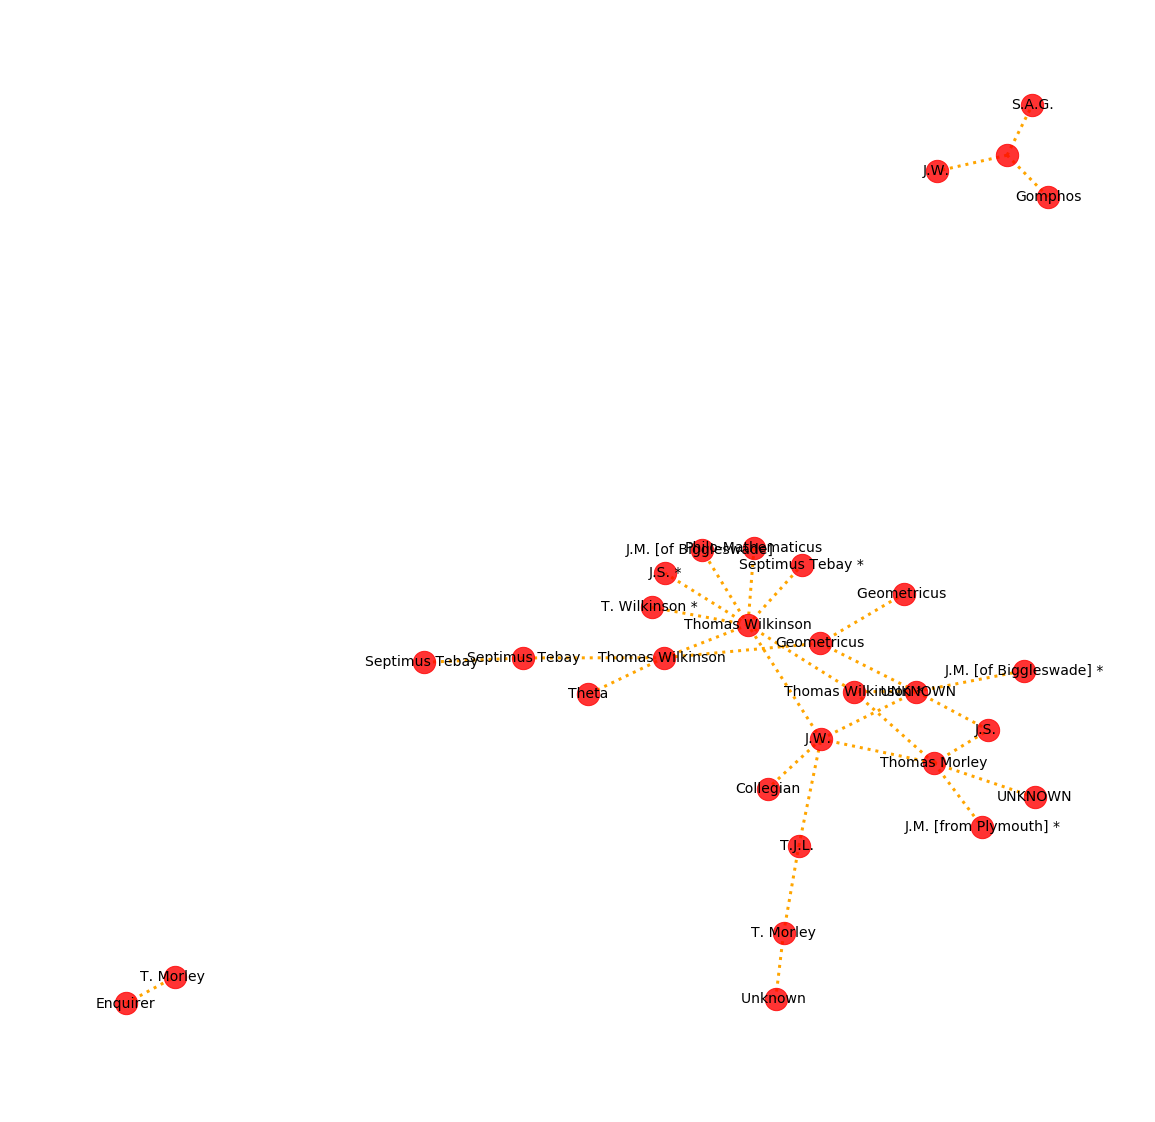

In [35]:
#reingold
#thick lines are on the side of the solver
D = nx.Graph()
D.add_edges_from(fixedSolver)

#width, length
plt.figure(figsize=(20,20))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.fruchterman_reingold_layout(D, scale=3)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(D, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_edges(D, pos=layout, width=3, style='dotted',
                       edge_color='orange')
nx.draw_networkx_labels(D, pos=layout, font_size=14)

#plt.show()
plt.savefig("week4solverFruchterman.png", format="PNG")